# References

### EEL4930 - Applied Machine Learning Systems
### CIS4930 - Intro to Machine Learning

# Imports

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv("dataset.csv")

# Data Exploratory Analysis

In [7]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [8]:
data.shape

(114000, 21)

In [9]:
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [10]:
data['track_name'].nunique

<bound method IndexOpsMixin.nunique of 0                             Comedy
1                   Ghost - Acoustic
2                     To Begin Again
3         Can't Help Falling In Love
4                            Hold On
                     ...            
113995           Sleep My Little Boy
113996              Water Into Light
113997                Miss Perfumado
113998                       Friends
113999                     Barbincor
Name: track_name, Length: 114000, dtype: object>

In [11]:
np.unique(data['track_genre'])

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film',
       'pow

# Data Preprocessing

In [13]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data_numeric = data.select_dtypes(include=[np.number])

In [14]:
data_numeric.columns

Index(['popularity', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [15]:
# Scaling Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# KNN

In [17]:
#KNN with cosine similarity

def cosineSim(vec1, vec2):
    dotProduct = np.dot(vec1, vec2)
    magnitude = np.linalg.norm(vec1) * np.linalg.norm(vec2)
    if magnitude != 0:
        return (dotProduct / magnitude)
    else:
        return 0
def knnRecommend(userSong, data, k=5):
    userVec = data[userSong]
    similarities = np.array([cosineSim(userVec, data[i]) for i in range(len(data))])
    recommended = np.argsort(-similarities)[1:k+1]
    return recommended

# Naive Bayes

In [19]:
# Naive Bayes
class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.means = {}
        self.variances = {}
        self.priors = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        # Can't use class, changed to cls
        for cls in self.classes:
            X_c = X[y == cls]
            self.means[cls] = np.mean(X_c, axis=0)
            self.variances[cls] = np.var(X_c, axis=0)
            self.priors[cls] = X_c.shape[0] / X.shape[0]

    def calcLikelihood(self, cls, x):
        mean = self.means[cls]
        variance = self.variances[cls]
        numerator = np.exp(-((x - mean) ** 2) / (2 * variance))
        denominator = np.sqrt(2 * np.pi * variance)
        return numerator / denominator

    def calcPosterior(self, x):
        posteriors = {}
        for cls in self.classes:
            prior = self.priors[cls]
            likelihood = np.prod(self.calcLikelihood(cls, x))
            posteriors[cls] = prior * likelihood
        return posteriors

    def predict(self, X, song_names, top_n=3):
        predictions = []
        for x in X:
            posteriors = self.calcPosterior(x)
            # Fixed bug with no output
            sorted_classes = sorted(posteriors.items(), key=lambda item: item[1], reverse=True)
            top_predictions = [song_names[cls] for cls, _ in sorted_classes[:top_n]]
            predictions.append(top_predictions)
        return predictions

In [20]:
# Train NB
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(data_scaled)
nb = NaiveBayes()
nb.fit(data_scaled, labels)

In [21]:
# Function called in Results that generates final recs in output
def recommendNB(userSongID, X, labels, model, k=5):
    userLabels = model.predict(X[userSongID:userSongID+1], data['track_name'], top_n=3)[0]
    userSongVector = X[userSongID]
    distances = np.linalg.norm(X - userSongVector, axis=1)
    recommendations = np.where(np.isin(data['track_name'].iloc[labels], userLabels))[0]
    sorted_recommendations = recommendations[np.argsort(distances[recommendations])]
    return sorted_recommendations[:k]

# Results

In [23]:
print("Welcome to the Song Recommendation System!")
print("Search for a song by typing part of its name." 
"The program will output 3 recommendations using KNN, 3 using Naive Bayes,"
"and determine the most closely linked song using Euclidean distance.")

# Prevents errors stemming from precense of null values
userSongs = []
data['track_name'] = data['track_name'].fillna('')
data['artists'] = data['artists'].fillna('')

# Allow the user to search and select a song
while True:
    search_query = input("Enter part of the song name to search: ").strip().lower()
    matching_songs = data[data['track_name'].str.lower().str.contains(search_query, na=False)]
    
    # Removes duplicate songs that aren't registered as duplicates in dataset
    matching_songs = matching_songs.drop_duplicates(subset=['track_name', 'artists'])

    # Have this to prevent error when user enters song not in dataset.
    if matching_songs.empty:
        print("No songs found. Please try again.")
    else:
        print("\nMatching songs:")
        for i, (index, row) in enumerate(matching_songs.iterrows(), 1):
            print(f"{i}: {row['track_name']} by {row['artists']}")
        
        try:
            # Ask the user to pick from the matches
            choice = int(input("\nEnter the number corresponding to your song choice: ")) - 1
            if 0 <= choice < len(matching_songs):
                selected_song = matching_songs.iloc[choice]
                print(f"You selected: {selected_song['track_name']} by {selected_song['artists']}")
                userSongs.append(selected_song.name)  # Store the index of the selected song
                break
            else:
                print("Invalid choice. Please try again.")
        except ValueError:
            print("Please enter a valid number.")

# Found these features to be the best when calculating recommendations
songFeatures = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
selectedFeatures = data.loc[userSongs[0], songFeatures].values.reshape(1, -1)

for songIndex in userSongs:
    print(f"\nRecommendations For: '{data.loc[songIndex, 'track_name']}' by {data.loc[songIndex, 'artists']}:")

    # Using KNN
    print("\nUsing KNN:")
    knnRecs = knnRecommend(songIndex, data_scaled, k=10)  # Request more recommendations initially, prevents bug where <3 songs are recommended.
    # Filter out the user's input song and deduplicate KNN recommendations
    knnRecs_df = data.loc[knnRecs, ['track_name', 'artists']].drop_duplicates()
    knnRecs_df = knnRecs_df[
        (knnRecs_df['track_name'] != data.loc[songIndex, 'track_name']) |
        (knnRecs_df['artists'] != data.loc[songIndex, 'artists'])
    ]
    unique_knn_recs = knnRecs_df.index[:3]  # Limit to 3 unique recommendations
    for rec in unique_knn_recs:
        print(f"- {data.loc[rec, 'track_name']} by {data.loc[rec, 'artists']}")

    # Using Naive Bayes
    print("\nUsing Naive Bayes:")
    nbRecs = recommendNB(songIndex, data_scaled, labels, nb, k=10)  # Request more recommendations initially, same bug as KNN fixed
    # Filter out the user's input song and deduplicate Naive Bayes recommendations
    nbRecs_df = data.loc[nbRecs, ['track_name', 'artists']].drop_duplicates()
    nbRecs_df = nbRecs_df[
        (nbRecs_df['track_name'] != data.loc[songIndex, 'track_name']) |
        (nbRecs_df['artists'] != data.loc[songIndex, 'artists'])
    ]
    unique_nb_recs = nbRecs_df.index[:3]  # Limit to 3 unique recommendations
    for rec in unique_nb_recs:
        print(f"- {data.loc[rec, 'track_name']} by {data.loc[rec, 'artists']}")

# Euclidean distance for most closely linked song, in the program this is how we calculate better algorithm but there are many more below.
from sklearn.metrics.pairwise import euclidean_distances

print("\nDetermining the most closely linked song using Euclidean distance:")
allRecommendations = list(unique_knn_recs) + list(unique_nb_recs)
userSongFeatures = data_scaled[userSongs[0]].reshape(1, -1)
distances = euclidean_distances(data_scaled[allRecommendations], userSongFeatures)
#Argmin found and cited from here: https://www.geeksforgeeks.org/numpy-argmin-python/
closestIndex = allRecommendations[distances.argmin()]

print(f"\nThe most closely linked song is: '{data.loc[closestIndex, 'track_name']}' by {data.loc[closestIndex, 'artists']}")

Welcome to the Song Recommendation System!
Search for a song by typing part of its name.The program will output 3 recommendations using KNN, 3 using Naive Bayes,and determine the most closely linked song using Euclidean distance.


Enter part of the song name to search:  stand up



Matching songs:
1: Stand Up by The Prodigy
2: Get Up Stand Up by DJ Sneak
3: Get Up, Stand Up by The Wailers
4: Stand Up by Tha Playah
5: Stand Up by (Hed) P.E.;Lajon Witherspoon;Sevendust
6: Stand Up, Sit Down by Patty Shukla
7: I Can't Stand Up For Falling Down by Elvis Costello & The Attractions
8: Stand Up by The Cab
9: Stand Up (From Harriet) by Cynthia Erivo



Enter the number corresponding to your song choice:  2


You selected: Get Up Stand Up by DJ Sneak

Recommendations For: 'Get Up Stand Up' by DJ Sneak:

Using KNN:
- Welcome to Southfield by Terrence Parker
- Echo & Bounce by Propellerheads
- Titties and Beer by dj funk

Using Naive Bayes:
- Welcome to Southfield by Terrence Parker
- Echo & Bounce by Propellerheads
- Raider - Mixed by Raumakustik

Determining the most closely linked song using Euclidean distance:

The most closely linked song is: 'Welcome to Southfield' by Terrence Parker


# Comparison

In [25]:
knn_distances = euclidean_distances(data_scaled[list(unique_knn_recs)], userSongFeatures)
nb_distances = euclidean_distances(data_scaled[list(unique_nb_recs)], userSongFeatures)

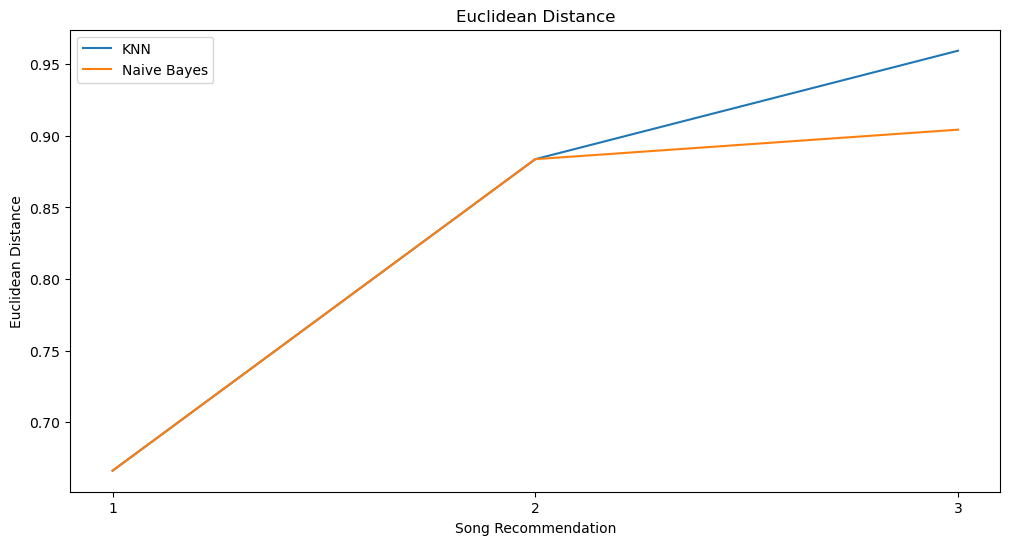

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(knn_distances, label='KNN')
plt.plot(nb_distances, label='Naive Bayes')
plt.xticks([0, 1, 2], ['1', '2', '3'])  # Set the tick labels from 1 to 3
plt.title('Euclidean Distance')
plt.xlabel('Song Recommendation')
plt.ylabel('Euclidean Distance')
plt.legend()
plt.show()

In [27]:
knn_distances2 = cosine_similarity(data_scaled[list(unique_knn_recs)], userSongFeatures)
nb_distances2 = cosine_similarity(data_scaled[list(unique_nb_recs)], userSongFeatures)

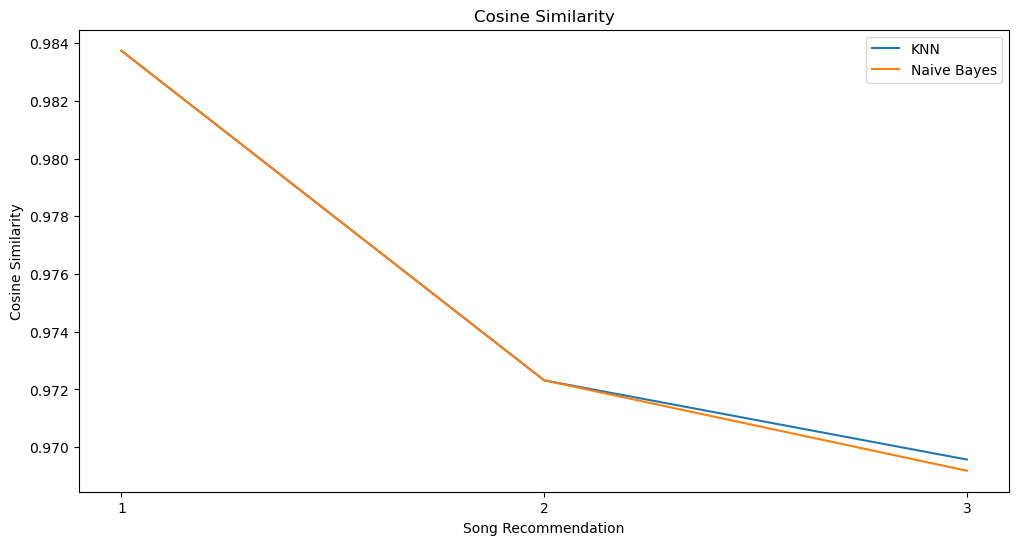

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(knn_distances2, label='KNN')
plt.plot(nb_distances2, label='Naive Bayes')
plt.xticks([0, 1, 2], ['1', '2', '3'])  # Set the tick labels from 1 to 3
plt.title('Cosine Similarity')
plt.xlabel('Song Recommendation')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics.pairwise import manhattan_distances

knn_distances3 = manhattan_distances(data_scaled[list(unique_knn_recs)], userSongFeatures)
nb_distances3 = manhattan_distances(data_scaled[list(unique_nb_recs)], userSongFeatures)

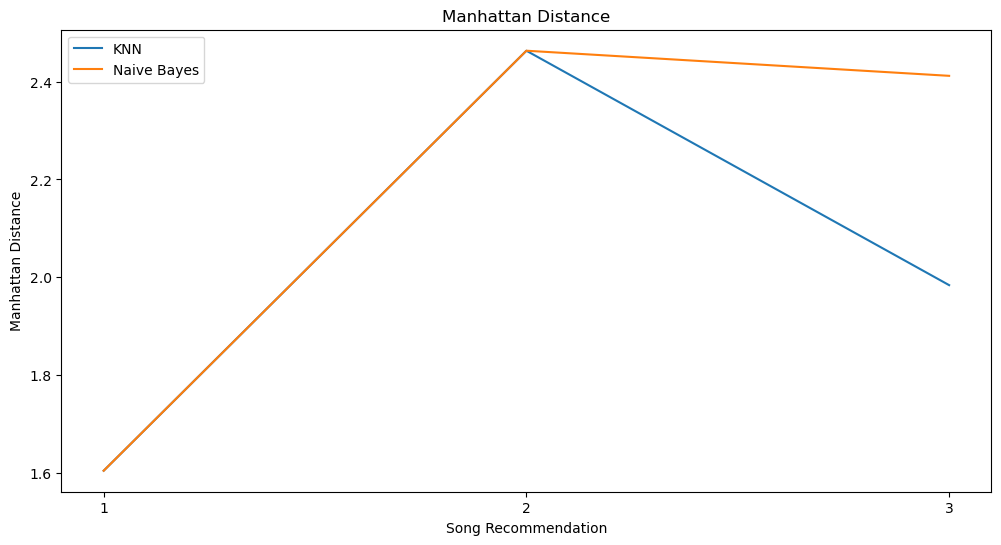

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(knn_distances3, label='KNN')
plt.plot(nb_distances3, label='Naive Bayes')
plt.xticks([0, 1, 2], ['1', '2', '3'])  # Set the tick labels from 1 to 3
plt.title('Manhattan Distance')
plt.xlabel('Song Recommendation')
plt.ylabel('Manhattan Distance')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics.pairwise import pairwise_distances

knn_distances4 = pairwise_distances(data_scaled[list(unique_knn_recs)], userSongFeatures, metric='hamming')
nb_distances4 = pairwise_distances(data_scaled[list(unique_nb_recs)], userSongFeatures, metric='hamming')

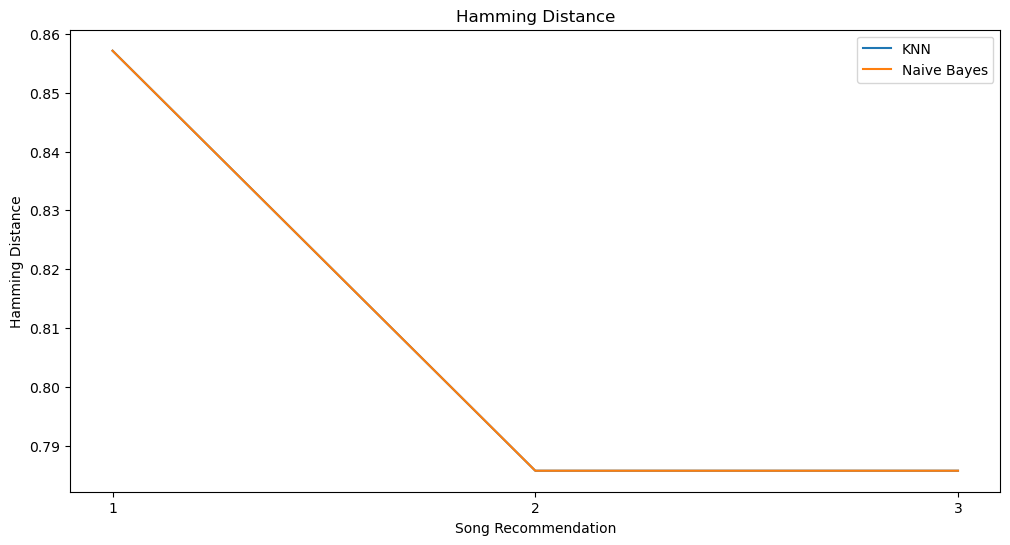

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(knn_distances4, label='KNN')
plt.plot(nb_distances4, label='Naive Bayes')
plt.xticks([0, 1, 2], ['1', '2', '3'])  # Set the tick labels from 1 to 3
plt.title('Hamming Distance')
plt.xlabel('Song Recommendation')
plt.ylabel('Hamming Distance')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics.pairwise import pairwise_distances

knn_distances5 = pairwise_distances(data_scaled[list(unique_knn_recs)], userSongFeatures, metric='correlation')
nb_distances5 = pairwise_distances(data_scaled[list(unique_nb_recs)], userSongFeatures, metric='correlation')

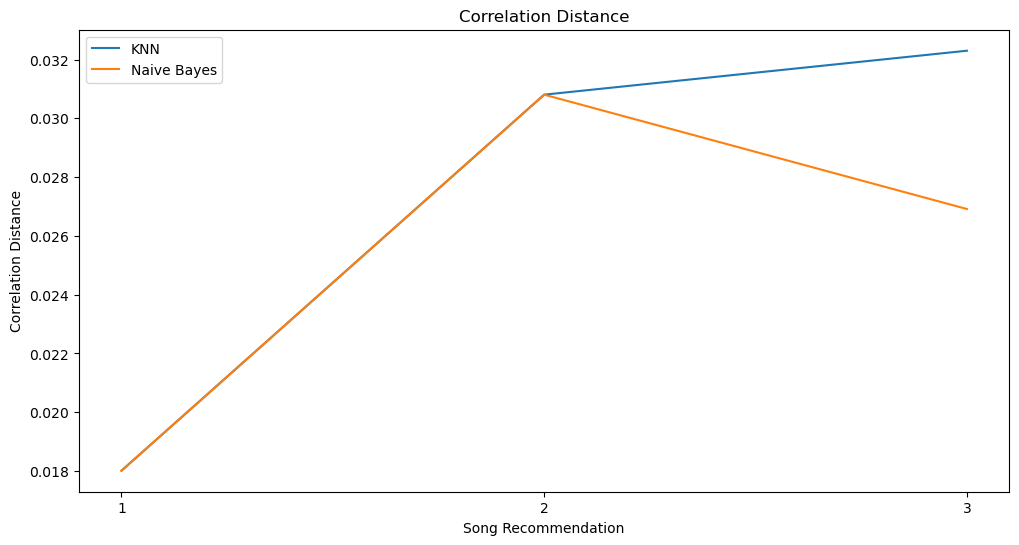

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(knn_distances5, label='KNN')
plt.plot(nb_distances5, label='Naive Bayes')
plt.xticks([0, 1, 2], ['1', '2', '3'])  # Set the tick labels from 1 to 3
plt.title('Correlation Distance')
plt.xlabel('Song Recommendation')
plt.ylabel('Correlation Distance')
plt.legend()
plt.show()